In [1]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

<IPython.core.display.Javascript object>


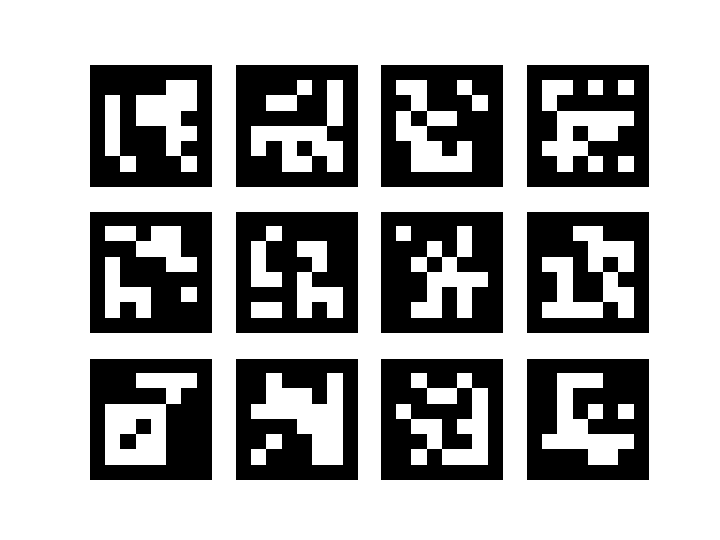

In [2]:
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.generateImageMarker(aruco_dict, i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("data/markers.pdf")    
plt.show()

# CALIBRAR CÁMARA

<IPython.core.display.Javascript object>


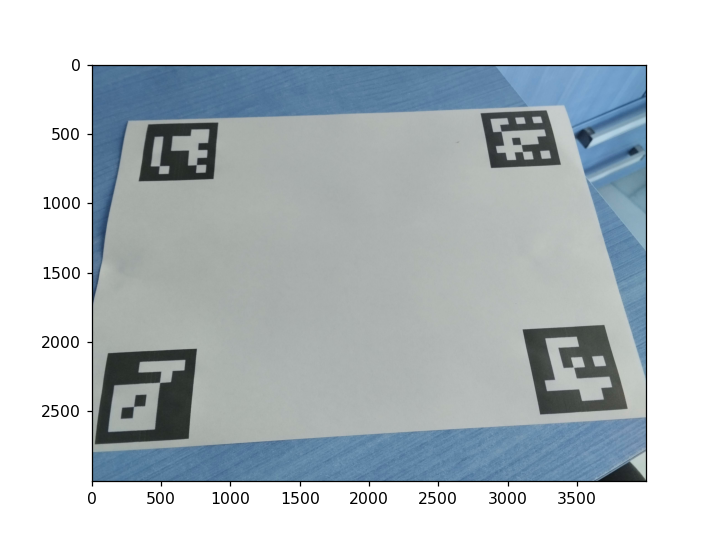

<IPython.core.display.Javascript object>


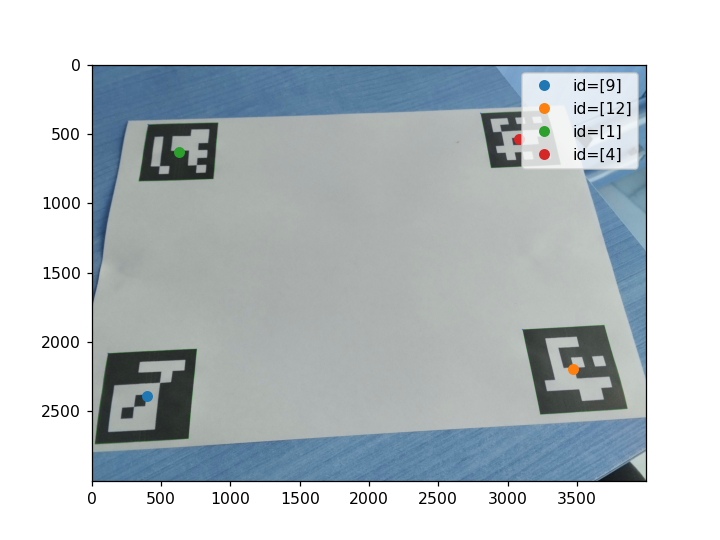

Aruco 1
[404.0, 429.0]
Aruco 4
[3277.0, 330.0]
Aruco 12
[3860.0, 2478.0]
Aruco 9
[19.0, 2733.0]


<IPython.core.display.Javascript object>


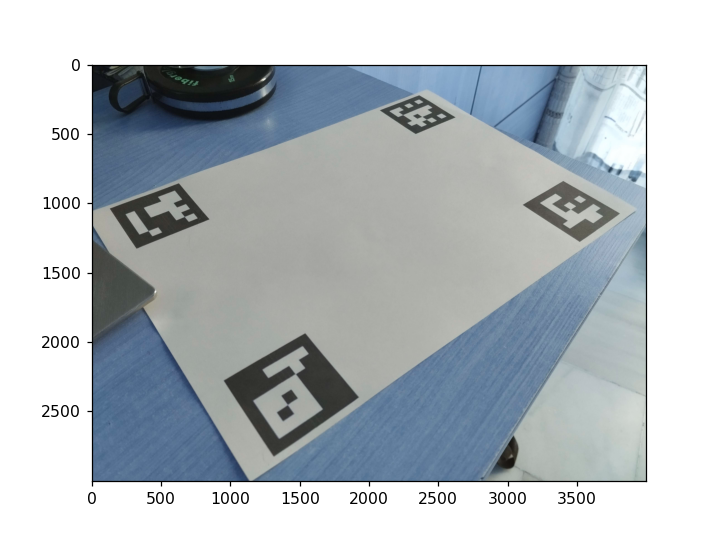

<IPython.core.display.Javascript object>


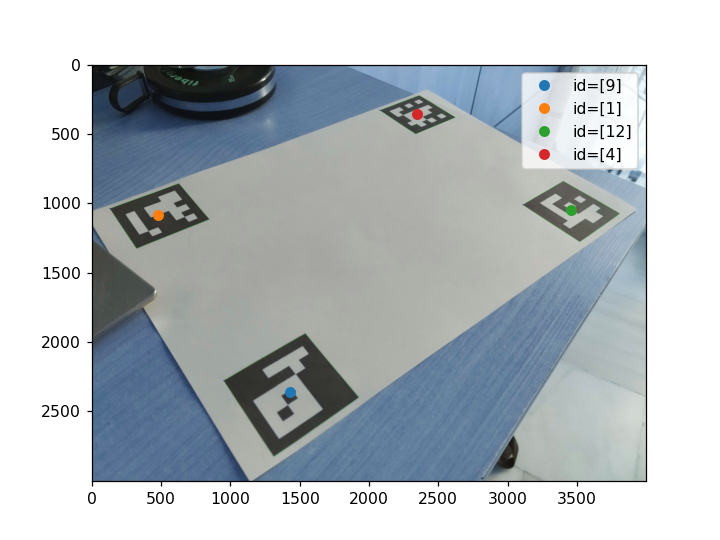

Aruco 1
[128.0, 1035.0]
Aruco 4
[2358.0, 219.0]
Aruco 12
[3804.0, 1071.0]
Aruco 9
[1312.0, 2824.0]


<IPython.core.display.Javascript object>


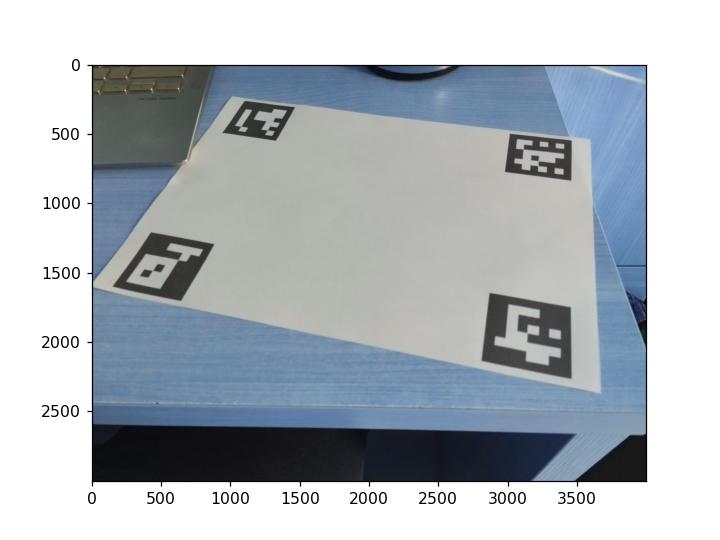

<IPython.core.display.Javascript object>


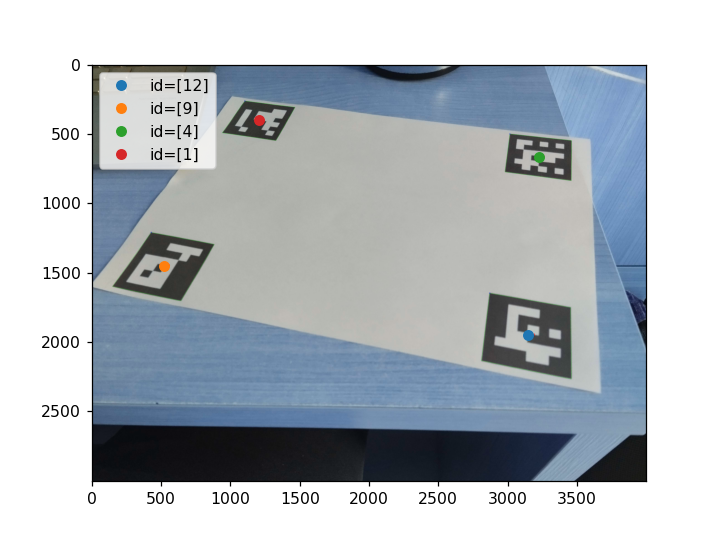

Aruco 1
[1101.0, 259.0]
Aruco 4
[3455.0, 544.0]
Aruco 12
[3454.0, 2265.0]
Aruco 9
[147.0, 1597.0]


<IPython.core.display.Javascript object>


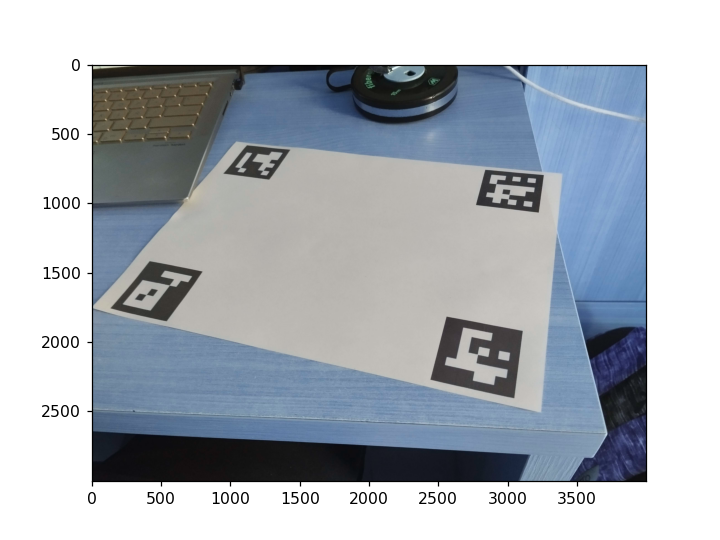

<IPython.core.display.Javascript object>


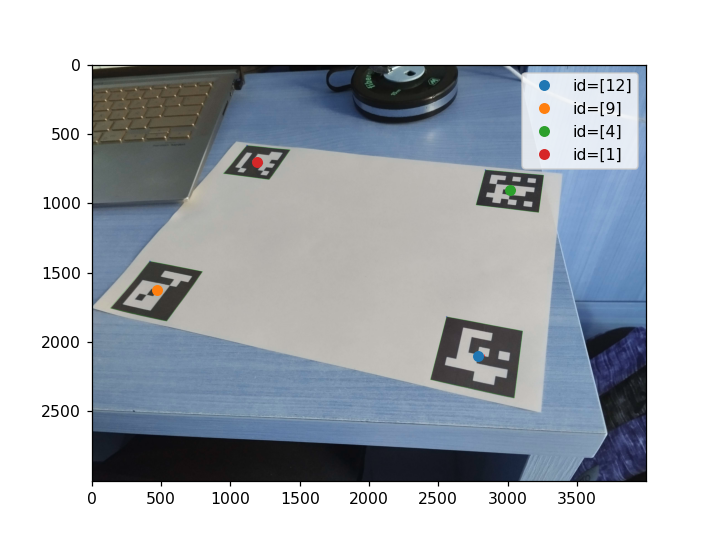

Aruco 1
[1116.0, 580.0]
Aruco 4
[3256.0, 794.0]
Aruco 12
[3044.0, 2401.0]
Aruco 9
[130.0, 1752.0]


<IPython.core.display.Javascript object>


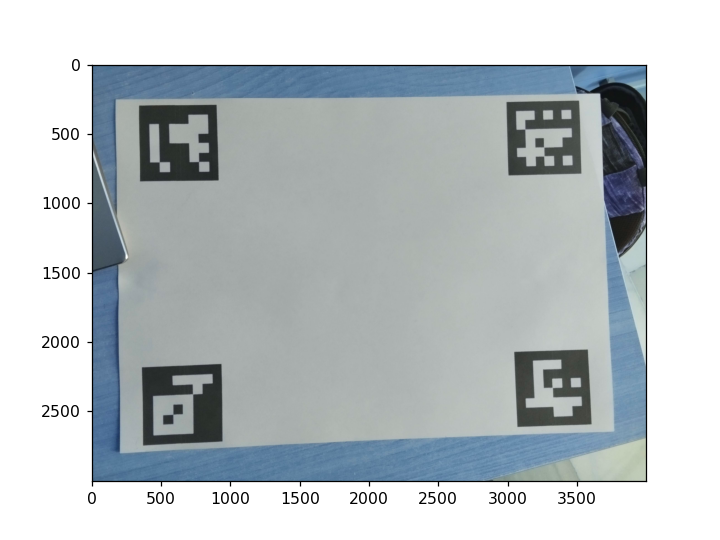

<IPython.core.display.Javascript object>


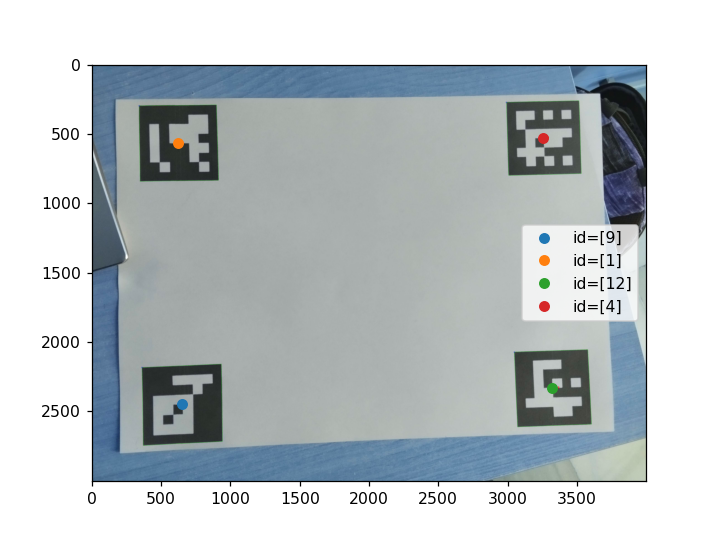

Aruco 1
[339.0, 294.0]
Aruco 4
[3509.0, 257.0]
Aruco 12
[3600.0, 2589.0]
Aruco 9
[369.0, 2744.0]


<IPython.core.display.Javascript object>


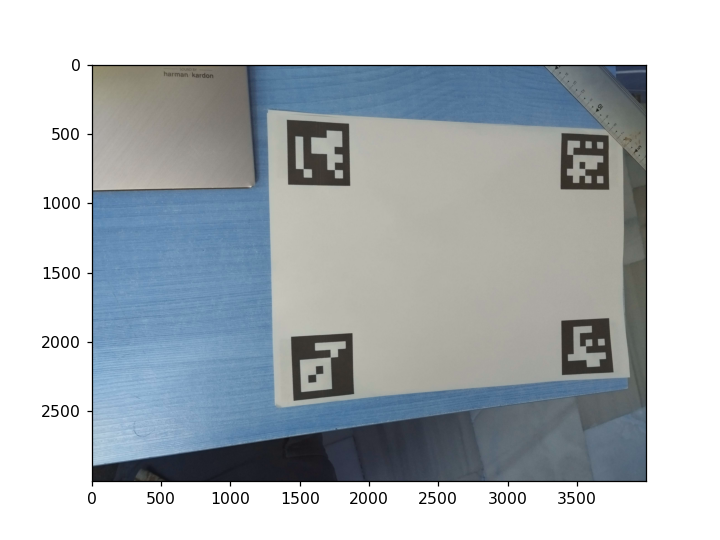

<IPython.core.display.Javascript object>


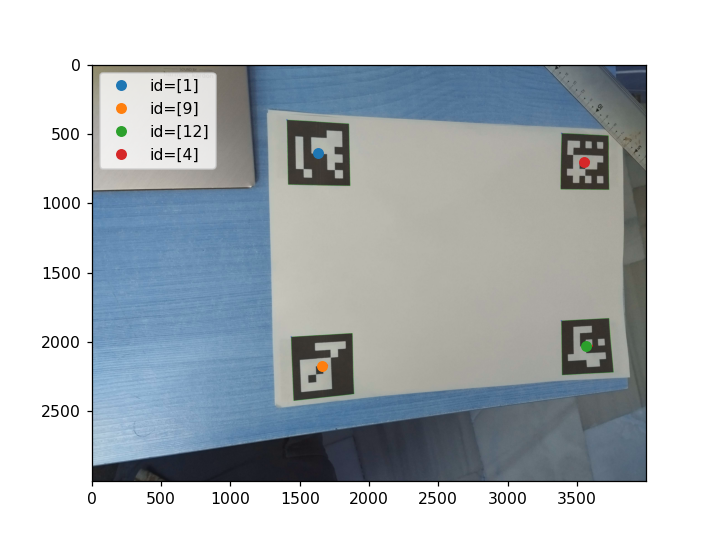

Aruco 1
[1404.0, 395.0]
Aruco 4
[3722.0, 509.0]
Aruco 12
[3759.0, 2215.0]
Aruco 9
[1453.0, 2421.0]

#################
Objpoints
[array([[  0., 202.,   0.],
       [270., 202.,   0.],
       [  0.,   0.,   0.],
       [270.,   0.,   0.]], dtype=float32), array([[  0., 202.,   0.],
       [270., 202.,   0.],
       [  0.,   0.,   0.],
       [270.,   0.,   0.]], dtype=float32), array([[  0., 202.,   0.],
       [270., 202.,   0.],
       [  0.,   0.,   0.],
       [270.,   0.,   0.]], dtype=float32), array([[  0., 202.,   0.],
       [270., 202.,   0.],
       [  0.,   0.,   0.],
       [270.,   0.,   0.]], dtype=float32), array([[  0., 202.,   0.],
       [270., 202.,   0.],
       [  0.,   0.,   0.],
       [270.,   0.,   0.]], dtype=float32), array([[  0., 202.,   0.],
       [270., 202.,   0.],
       [  0.,   0.,   0.],
       [270.,   0.,   0.]], dtype=float32)]
Imgpoints
[array([[ 404.,  429.],
       [3277.,  330.],
       [  19., 2733.],
       [3860., 2478.]], dtype=float32), a

In [3]:
import glob

objpoints = []
imgpoints = []

for plantilla in glob.glob("plantilla*.jpg"):
    
    # Visualizar la imagen
    frame = cv2.imread(plantilla)
    plt.figure()
    plt.imshow(frame)
    plt.show()
    
    # Aplicar aruco
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
    parameters =  aruco.DetectorParameters()
    detector = aruco.ArucoDetector(aruco_dict, parameters)
    corners, ids, rejectedImgPoints = detector.detectMarkers(gray)
    frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
    
    # Visualizar aruco
    plt.figure()
    plt.imshow(frame_markers)
    for i in range(len(ids)):
        c = corners[i][0]
        plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
    plt.legend()
    plt.show()
    
    # Leer aruco
    def quad_area(data):
        l = data.shape[0]//2
        corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
        c1 = corners[:, :, 0]
        c2 = corners[:, :, 1]
        c3 = corners[:, :, 2]
        c4 = corners[:, :, 3]
        e1 = c2-c1
        e2 = c3-c2
        e3 = c4-c3
        e4 = c1-c4
        a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
        return a

    corners2 = np.array([c[0] for c in corners])

    data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                       index = pd.MultiIndex.from_product( 
                               [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                           names = ["marker", ""] ))


    data = data.unstack().swaplevel(0, 1, axis = 1).stack()
    data["m1"] = data[["c1", "c2"]].mean(axis = 1)
    data["m2"] = data[["c2", "c3"]].mean(axis = 1)
    data["m3"] = data[["c3", "c4"]].mean(axis = 1)
    data["m4"] = data[["c4", "c1"]].mean(axis = 1)
    data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
    #print(data)
    
    # Esquinas
    print('Aruco 1')
    aruco1 = list(data.loc[(1, "c1")].values)
    print(aruco1)

    print('Aruco 4')
    aruco4 = list(data.loc[(4, "c2")].values)
    print(aruco4)

    print('Aruco 12')
    aruco12 = list(data.loc[(12, "c3")].values)
    print(aruco12)

    print('Aruco 9')
    aruco9 = list(data.loc[(9, "c4")].values)
    print(aruco9)
    
    img = np.array([
                            aruco1,     aruco4,
                            aruco9,     aruco12     
                        ], dtype=np.float32)


    obj = np.array([
                                (0., 202., 0.),     (270., 202., 0.),     
                                (0., 0., 0.),       (270., 0., 0.)    
                            ], dtype=np.float32)
    objpoints.append(obj)  # Agregar la matriz de puntos 3D a objpoints
    imgpoints.append(img)  # Agregar la matriz de puntos 2D a imgpoints
    
print("\n#################")
print("Objpoints")
print(objpoints)
print("Imgpoints")
print(imgpoints)

objpoints = np.array([objpoints], dtype=np.float32)
objpoints = np.squeeze(objpoints)
imgpoints = np.array([imgpoints], dtype=np.float32)
imgpoints = np.squeeze(imgpoints)


print("\n#################")
print("Objpoints")
print(objpoints)
print("Imgpoints")
print(imgpoints)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# DETECCIÓN DE PUNTOS

<IPython.core.display.Javascript object>


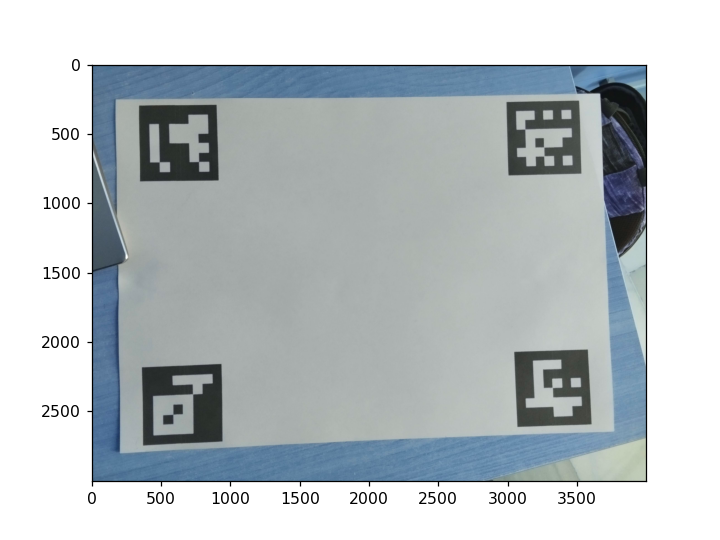

In [4]:
photo = cv2.imread("plantilla5.jpg")
plt.figure()
plt.imshow(photo)
plt.show()

In [5]:
%%time
gray = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters()
detector = aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)
photo_markers = aruco.drawDetectedMarkers(photo.copy(), corners, ids)

CPU times: total: 172 ms
Wall time: 99.9 ms


<IPython.core.display.Javascript object>


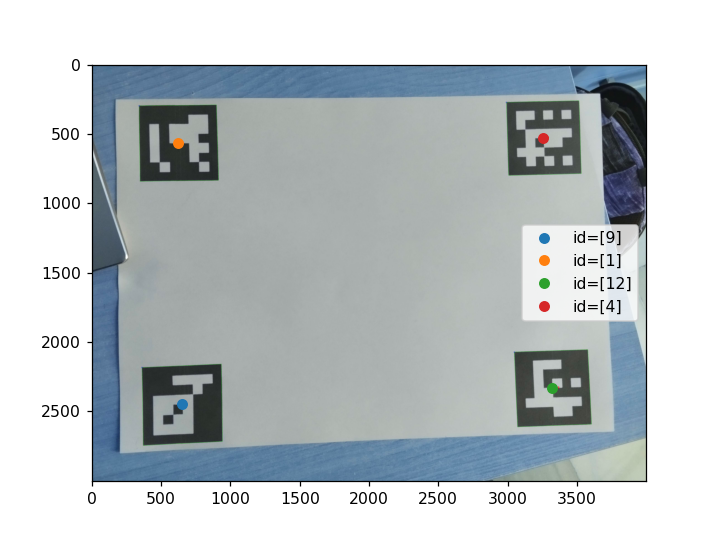

In [6]:
plt.figure()
plt.imshow(photo_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [7]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))


data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

c1      c2      c3      c4      m1      m2      m3      m4  \
marker                                                                     
1      x   339.0   896.0   912.0   346.0   617.5   904.0   629.0   342.5   
       y   294.0   287.0   830.0   839.0   290.5   558.5   834.5   566.5   
4      x  2986.0  3509.0  3526.0  3003.0  3247.5  3517.5  3264.5  2994.5   
       y   269.0   257.0   783.0   797.0   263.0   520.0   790.0   533.0   
9      x   360.0   931.0   940.0   369.0   645.5   935.5   654.5   364.5   
       y  2181.0  2156.0  2714.0  2744.0  2168.5  2435.0  2729.0  2462.5   
12     x  3043.0  3573.0  3600.0  3067.0  3308.0  3586.5  3333.5  3055.0   
       y  2070.0  2052.0  2589.0  2610.0  2061.0  2320.5  2599.5  2340.0   

                o  
marker             
1      x   623.25  
       y   562.50  
4      x  3256.00  
       y   526.50  
9      x   650.00  
       y  2448.75  
12     x  3320.75  
       y  2330.25

In [8]:
print('Aruco 1')
aruco1 = list(data.loc[(1, "c1")].values)
print(aruco1)

print('Aruco 4')
aruco4 = list(data.loc[(4, "c2")].values)
print(aruco4)

print('Aruco 12')
aruco12 = list(data.loc[(12, "c3")].values)
print(aruco12)

print('Aruco 9')
aruco9 = list(data.loc[(9, "c4")].values)
print(aruco9)

Aruco 1
[339.0, 294.0]
Aruco 4
[3509.0, 257.0]
Aruco 12
[3600.0, 2589.0]
Aruco 9
[369.0, 2744.0]


# POSICIÓN DE CÁMARA

########################2


<IPython.core.display.Javascript object>


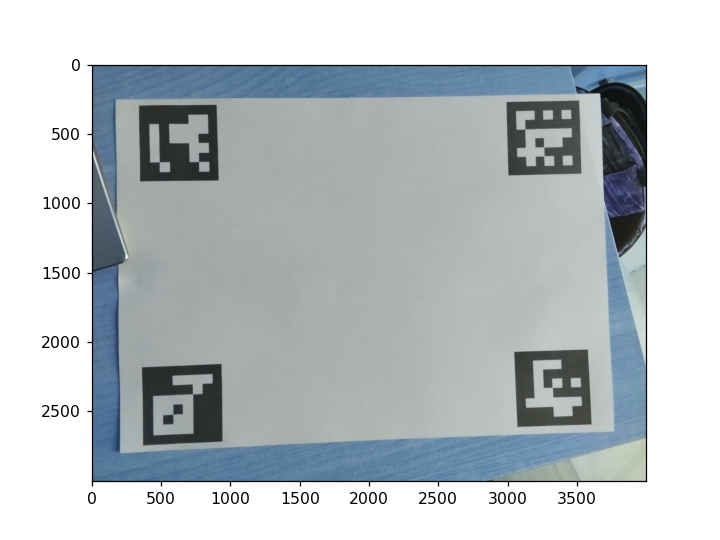

Posición de la cámara
x = [[119.75087415]]
y = [[102.21514717]]
z = [[298.98342021]]
Ángulo de la cámara
359.94564 -3.5021 -1.58951


In [9]:
import cv2
import numpy as np
import math
from scipy.spatial.transform import Rotation

def focalMM_to_focalPixel( focalMM, pixelPitch ):
    f = focalMM / pixelPitch
    return f

# Read Image
im = photo
size = im.shape

imageWidth = size[1]
imageHeight = size[0]
imageSize = [imageWidth, imageHeight]

points_2D = np.array([
                            (aruco1),     (aruco4),
                            (aruco9),     (aruco12)     
                        ])


points_3D = np.array([
                            (0., 202., 0),  (270., 202., 0),
                            (0., 0., 0),  (270., 0., 0)    
                        ])


print("########################2")

success, rvecs, tvecs = cv2.solvePnP(points_3D, points_2D, mtx, dist, flags=cv2.SOLVEPNP_ITERATIVE)

np_rodrigues = np.asarray(rvecs[:,:],np.float64)
rmat = cv2.Rodrigues(np_rodrigues)[0]
camera_position = -np.matrix(rmat).T @ np.matrix(tvecs)

#Test the solvePnP by projecting the 3D Points to camera
projPoints = cv2.projectPoints(points_3D, rvecs, tvecs, mtx, dist)[0]

for p in points_2D:
 cv2.circle(im, (int(p[0]), int(p[1])), 3, (0,255,0), -1)

for p in projPoints:
 cv2.circle(im, (int(p[0][0]), int(p[0][1])), 3, (255,0,0), -1)

plt.figure()
plt.imshow(im)

r = Rotation.from_rotvec([rvecs[0][0],rvecs[1][0],rvecs[2][0]])
rot = r.as_euler('xyz', degrees=True)

tx = camera_position[0][0]
ty = camera_position[1][0]
tz = camera_position[2][0]

rx = round(180-rot[0],5) 
ry = round(rot[1],5) 
rz = round(rot[2],5) 

print("Posición de la cámara")
print("x =", tx)
print("y =", ty)
print("z =", tz)
print("Ángulo de la cámara")
print(rx,ry,rz)

In [10]:
1


1